In [1]:
import pickle as pkl
from glob import glob
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Load the data
results = []
#Change this to wherever you have the data
PATH = "../Data/results/RCInitCond/"
for filen in glob(PATH + "**/*.pkl",recursive=True):
    if filen[-10:]!='config.pkl':
        with open(filen, 'rb') as file:
            results.append(pkl.load(file))

In [3]:
print(len(results))
results[0]

30


{'continue': [2.539999999999999,
  2.75,
  0.9200000000000017,
  2.539999999999999,
  1.9399999999999977,
  2.6199999999999974,
  3.280000000000001,
  0.6899999999999977,
  1.259999999999998,
  3.039999999999999,
  3.3900000000000006,
  2.4299999999999997,
  1.8699999999999974,
  3.3900000000000006,
  3.3900000000000006,
  1.9500000000000028,
  2.759999999999998,
  0.7000000000000028,
  2.039999999999999,
  3.3900000000000006,
  1.5600000000000023,
  1.3299999999999983,
  1.1700000000000017,
  3.3900000000000006,
  2.240000000000002],
 'random': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'cont_deriv_fit': [(0.005547792007220664, 3.256037708276807),
  (0.0017055721791052747, 2.073619512172928),
  (0.008815914989924067, 2.3445736617496777),
  (0.007294651736003743, 1.7788688797839427),
  (0.0006925508898447674, 1.3000391891473555),
  (0.0018055009100805819,

In [4]:
#Split the data by system

results_split = {item:[] for item in {'lorenz', 'thomas', 'rossler', 'softrobot'}}
for item in results:
    results_split[item['experiment'][0]].append(item)

for name in results_split:
    print(f"{name}: {len(results_split[name])} items")

thomas: 9 items
softrobot: 0 items
rossler: 8 items
lorenz: 13 items


In [5]:
def boxplots(data_list, which, loc='upper left', sort=True):
    names = np.array([' '.join(item['experiment'][1:]) for item in data_list])
    data = np.array([item[which] for item in data_list])
    if sort:
        means = np.median(data,axis=1)
        order = np.argsort(means).astype(int)
    else:
        order = np.arange(data.shape[0]).astype(int)
    plt.boxplot(data[order,:].T, labels=names[order], vert=False)

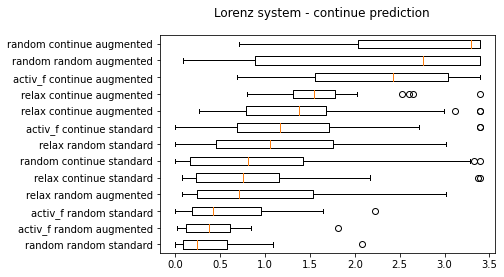

In [6]:
boxplots(results_split['lorenz'], 'continue')
plt.suptitle('Lorenz system - continue prediction')
plt.show()

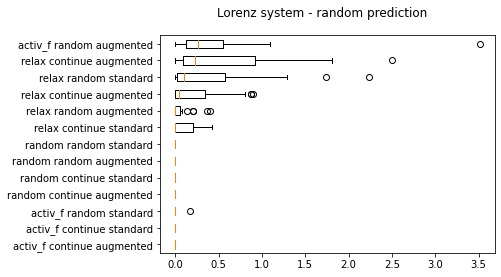

In [7]:
boxplots(results_split['lorenz'], 'random')
plt.suptitle('Lorenz system - random prediction')
plt.show()

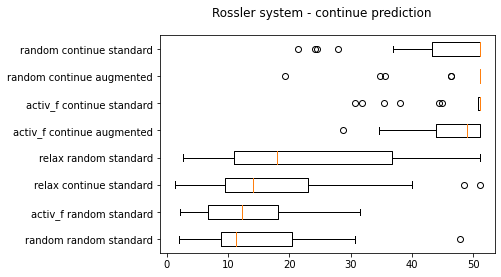

In [8]:
boxplots(results_split['rossler'], 'continue')
plt.suptitle('Rossler system - continue prediction')
plt.show()

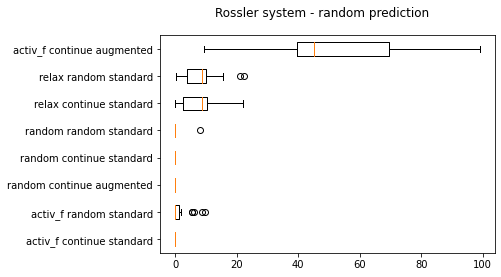

In [9]:
boxplots(results_split['rossler'], 'random')
plt.suptitle('Rossler system - random prediction')
plt.show()

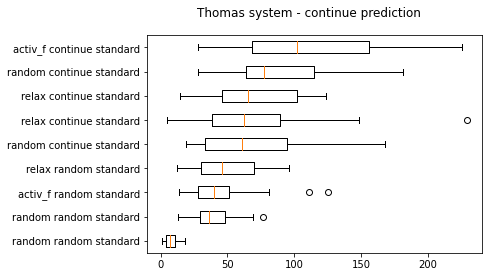

In [10]:
boxplots(results_split['thomas'], 'continue')
plt.suptitle('Thomas system - continue prediction')
plt.show()

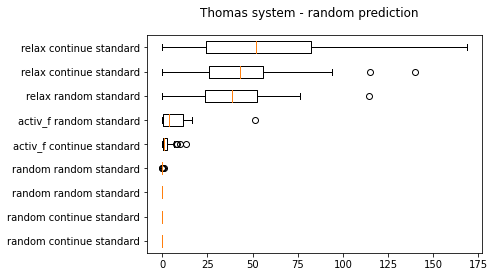

In [11]:
boxplots(results_split['thomas'], 'random')
plt.suptitle('Thomas system - random prediction')
plt.show()